In [1]:
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tqdm import tqdm

In [3]:
import os

dataset_path = "/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset"
print("Dataset structure:")
for folder in ["train", "valid", "test"]:
    print(f"{folder} - Images: {len(os.listdir(os.path.join(dataset_path, folder, 'images')))}, Labels: {len(os.listdir(os.path.join(dataset_path, folder, 'labels')))}")


Dataset structure:
train - Images: 4059, Labels: 4059
valid - Images: 1159, Labels: 1159
test - Images: 580, Labels: 580


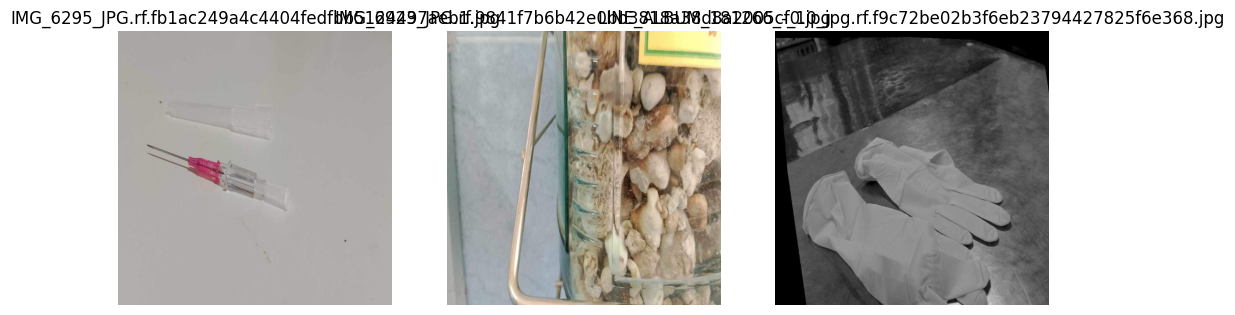

In [4]:
import random

image_folder = "/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/images"
sample_images = random.sample(os.listdir(image_folder), 3)

plt.figure(figsize=(12, 6))
for i, img in enumerate(sample_images):
    img_path = os.path.join(image_folder, img)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(img)
    plt.axis("off")

plt.show()

In [8]:
label_folder = "/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/labels"
sample_label = random.choice(os.listdir(label_folder))
print("Sample label file content:")
with open(os.path.join(label_folder, sample_label), "r") as f:
    print(f.read())

Sample label file content:
10 0.43984375 0.50078125 0.48515625 0.5046875


In [ ]:
from ultralytics import YOLO

# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml",
    epochs=25,  
    patience= 5, # increase epochs for better learning
    imgsz=640,         # image size
    batch=16,          # batch size
    lr0=0.01,          # initial learning rate
    warmup_epochs=3,   # warmup to stabilize early training
    weight_decay=0.0005,  # regularization
    device=device,     # use GPU or CPU
    verbose=True,      # show detailed logs
    workers=4,         # number of data loading workers
    project="runs/train",  # where to save results
    name="yolov11_waste_cls",  # experiment name
    exist_ok=True,     # overwrite existing folder if exists
)

Using device: cpu


100%|██████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 25.8MB/s]


New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=4, project=runs/train, name=yolov11_waste_cls, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/label

train: WARNING ⚠️ /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/images/IMG_6395_JPG.rf.a6967495f131e9a7d16d9428fcc5103e.jpg: 1 duplicate labels removed
train: New cache created: /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/labels.cache



val: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/valid/labels.

val: New cache created: /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/valid/labels.cache
Plotting labels to runs/train/yolov11_waste_cls/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/yolov11_waste_cls
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.566      3.595      1.923         25        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.453      0.608      0.536      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.623      2.489       1.92         28        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196       0.56      0.626      0.605      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.612      2.128      1.881         27        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.566      0.575      0.587      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/25         0G      1.618      1.917       1.87         26        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.724      0.703      0.745       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/25         0G      1.586      1.776      1.848         25        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.734      0.736      0.748      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/25         0G      1.582      1.655       1.83         29        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.742      0.738       0.79      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/25         0G      1.556      1.565      1.816         26        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.777      0.785      0.794      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/25         0G      1.559      1.499       1.83         32        640:   6%|▋         | 16/2

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/train/yolov11_waste_cls/weights/last.pt")  # path to last saved checkpoint
model.train(
    data="/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml",
    epochs=13,  # or remaining epochs
    resume=True
)


New https://pypi.org/project/ultralytics/8.3.108 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=runs/train/yolov11_waste_cls/weights/last.pt, data=/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=runs/train, name=yolov11_waste_cls, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/train/yolov11_waste_cls/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/label

train: WARNING ⚠️ /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/images/IMG_6395_JPG.rf.a6967495f131e9a7d16d9428fcc5103e.jpg: 1 duplicate labels removed



val: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/valid/labels.

Plotting labels to runs/train/yolov11_waste_cls/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training runs/train/yolov11_waste_cls/weights/last.pt from epoch 9 to 25 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/yolov11_waste_cls
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.533      1.367      1.822         25        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.827      0.826      0.867      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/25         0G      1.516      1.349      1.769         28        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.818      0.865      0.876      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/25         0G      1.476      1.309      1.733         27        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.833      0.842      0.872      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.492      1.261      1.747         26        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.837      0.865      0.888      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/25         0G      1.459      1.245      1.725         25        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.854       0.86      0.888      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/25         0G      1.462      1.205      1.717         29        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.845      0.885      0.897       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/25         0G      1.453      1.176      1.728         26        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.859      0.868       0.89      0.447
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/25         0G      1.539     0.9521      2.041         12        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.845      0.867      0.897      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/25         0G      1.538     0.8643      2.021         12        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.858      0.879      0.904      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/25         0G      1.504     0.8362      2.011         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.877      0.866      0.906       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/25         0G      1.486     0.8254      1.971         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.869      0.883      0.911      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/25         0G       1.48     0.7859      1.972         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.866      0.888      0.909      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      21/25         0G       1.47      0.767      1.958         12        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.872      0.892      0.911      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.449     0.7431      1.938         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.872      0.892      0.919      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/254 [00:00<?, ?it/s]

In [15]:
from ultralytics import YOLO

model = YOLO("runs/train/yolov11_waste_cls/weights/last.pt")  # path to last saved checkpoint
model.train(
    data="/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml",
    resume=True
)


New https://pypi.org/project/ultralytics/8.3.108 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=runs/train/yolov11_waste_cls/weights/last.pt, data=/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=runs/train, name=yolov11_waste_cls, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/train/yolov11_waste_cls/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/label

train: WARNING ⚠️ /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/train/images/IMG_6395_JPG.rf.a6967495f131e9a7d16d9428fcc5103e.jpg: 1 duplicate labels removed



val: Scanning /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/valid/labels.

Plotting labels to runs/train/yolov11_waste_cls/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training runs/train/yolov11_waste_cls/weights/last.pt from epoch 23 to 25 total epochs
Closing dataloader mosaic
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/yolov11_waste_cls
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.428     0.7389       1.93         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.883      0.894      0.922      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/25         0G      1.417     0.7232      1.918         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196      0.899      0.885       0.92      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/25         0G      1.412     0.7195      1.911         11        640: 100%|██████████| 254/
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████

                   all       1159       1196       0.88       0.89      0.916       0.48

3 epochs completed in 1.322 hours.
Optimizer stripped from runs/train/yolov11_waste_cls/weights/last.pt, 5.5MB


Optimizer stripped from runs/train/yolov11_waste_cls/weights/best.pt, 5.5MB

Validating runs/train/yolov11_waste_cls/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
YOLO11n summary (fused): 100 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|█████


                   all       1159       1196      0.883      0.895      0.922      0.485
  Body Tissue or organ        109        111      0.833      0.739      0.833      0.515
                 Gauze         94         94      0.825      0.979      0.973      0.463
       Glass_equipment         76         76      0.868      0.908      0.883      0.354
                Gloves        104        104      0.969          1      0.974      0.655
                  Mask         81         84      0.806      0.988      0.952      0.539
       Metal_equipment         71         71      0.896      0.746      0.897      0.393
       Paper_equipment         88         88      0.992      0.989      0.995      0.641
     Plastic_equipment        128        128      0.982      0.984      0.989      0.546
               Syringe         98        130      0.881      0.931      0.942      0.464
        Syringe_needle        120        120      0.777      0.611      0.796       0.34
         organic_wast

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x333b1c310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0


0: 640x640 1 Plastic_equipment, 38.0ms
1: 640x640 1 tweezers, 38.0ms
2: 640x640 1 Body Tissue or organ, 38.0ms
3: 640x640 1 Gloves, 38.0ms
4: 640x640 1 Gauze, 38.0ms
5: 640x640 1 Mask, 38.0ms
6: 640x640 2 Syringes, 38.0ms
7: 640x640 1 organic_waste, 38.0ms
Speed: 1.3ms preprocess, 38.0ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


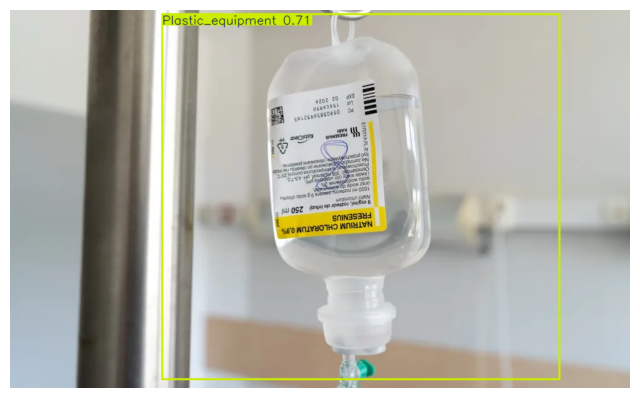

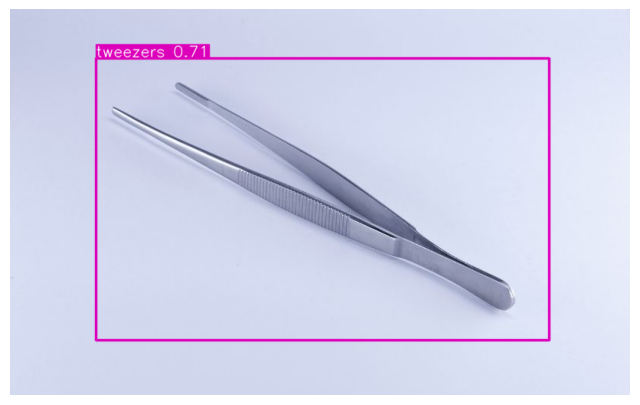

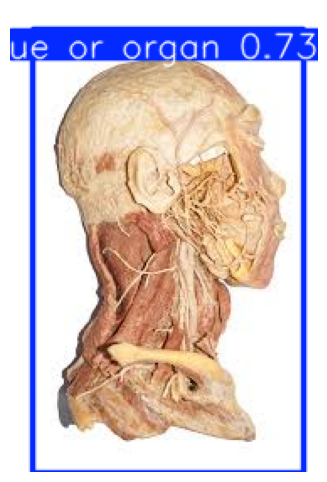

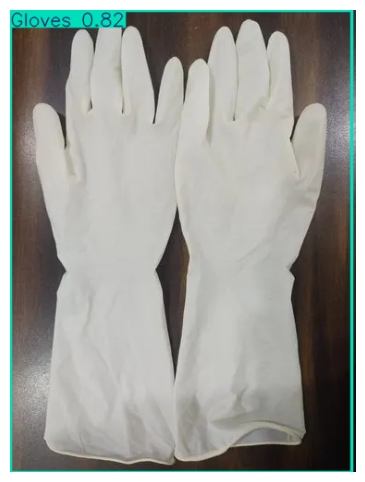

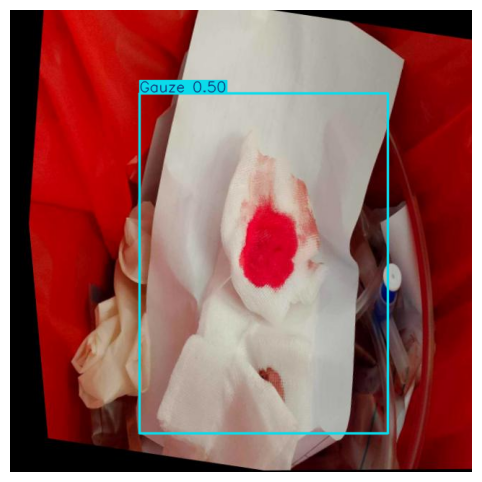

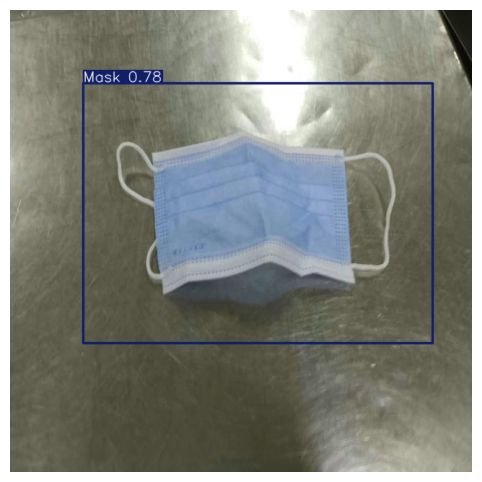

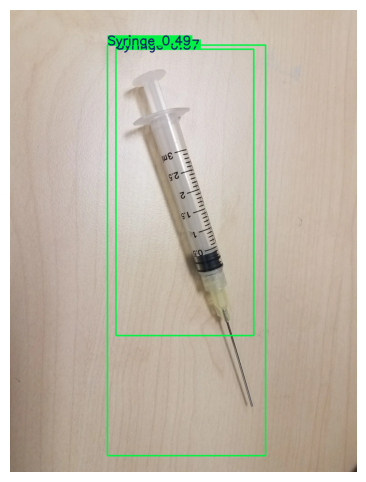

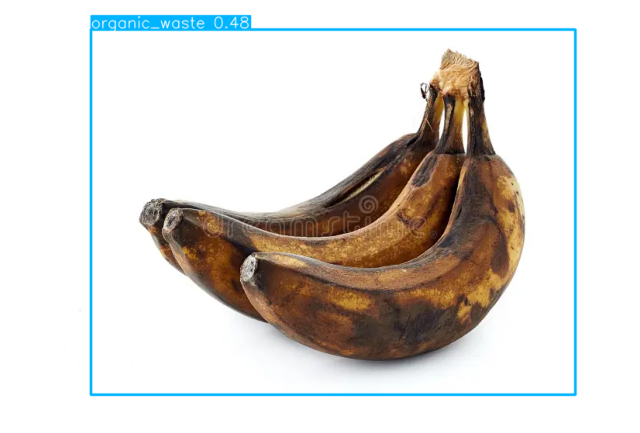

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/runs/train/yolov11_waste_cls/weights/best.pt")  # Update with your model path

# Path to a test image
test_image_path = ["/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/t3.webp","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/Tweezers.jpg","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/images.jpeg","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s7.webp","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s5.jpg","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/m.jpg","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s.webp","/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/pic1.webp"]

# Run inference
results = model(test_image_path)

# Show the image with detections
for result in results:
    img_with_boxes = result.plot()  # Draws boxes on the image

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


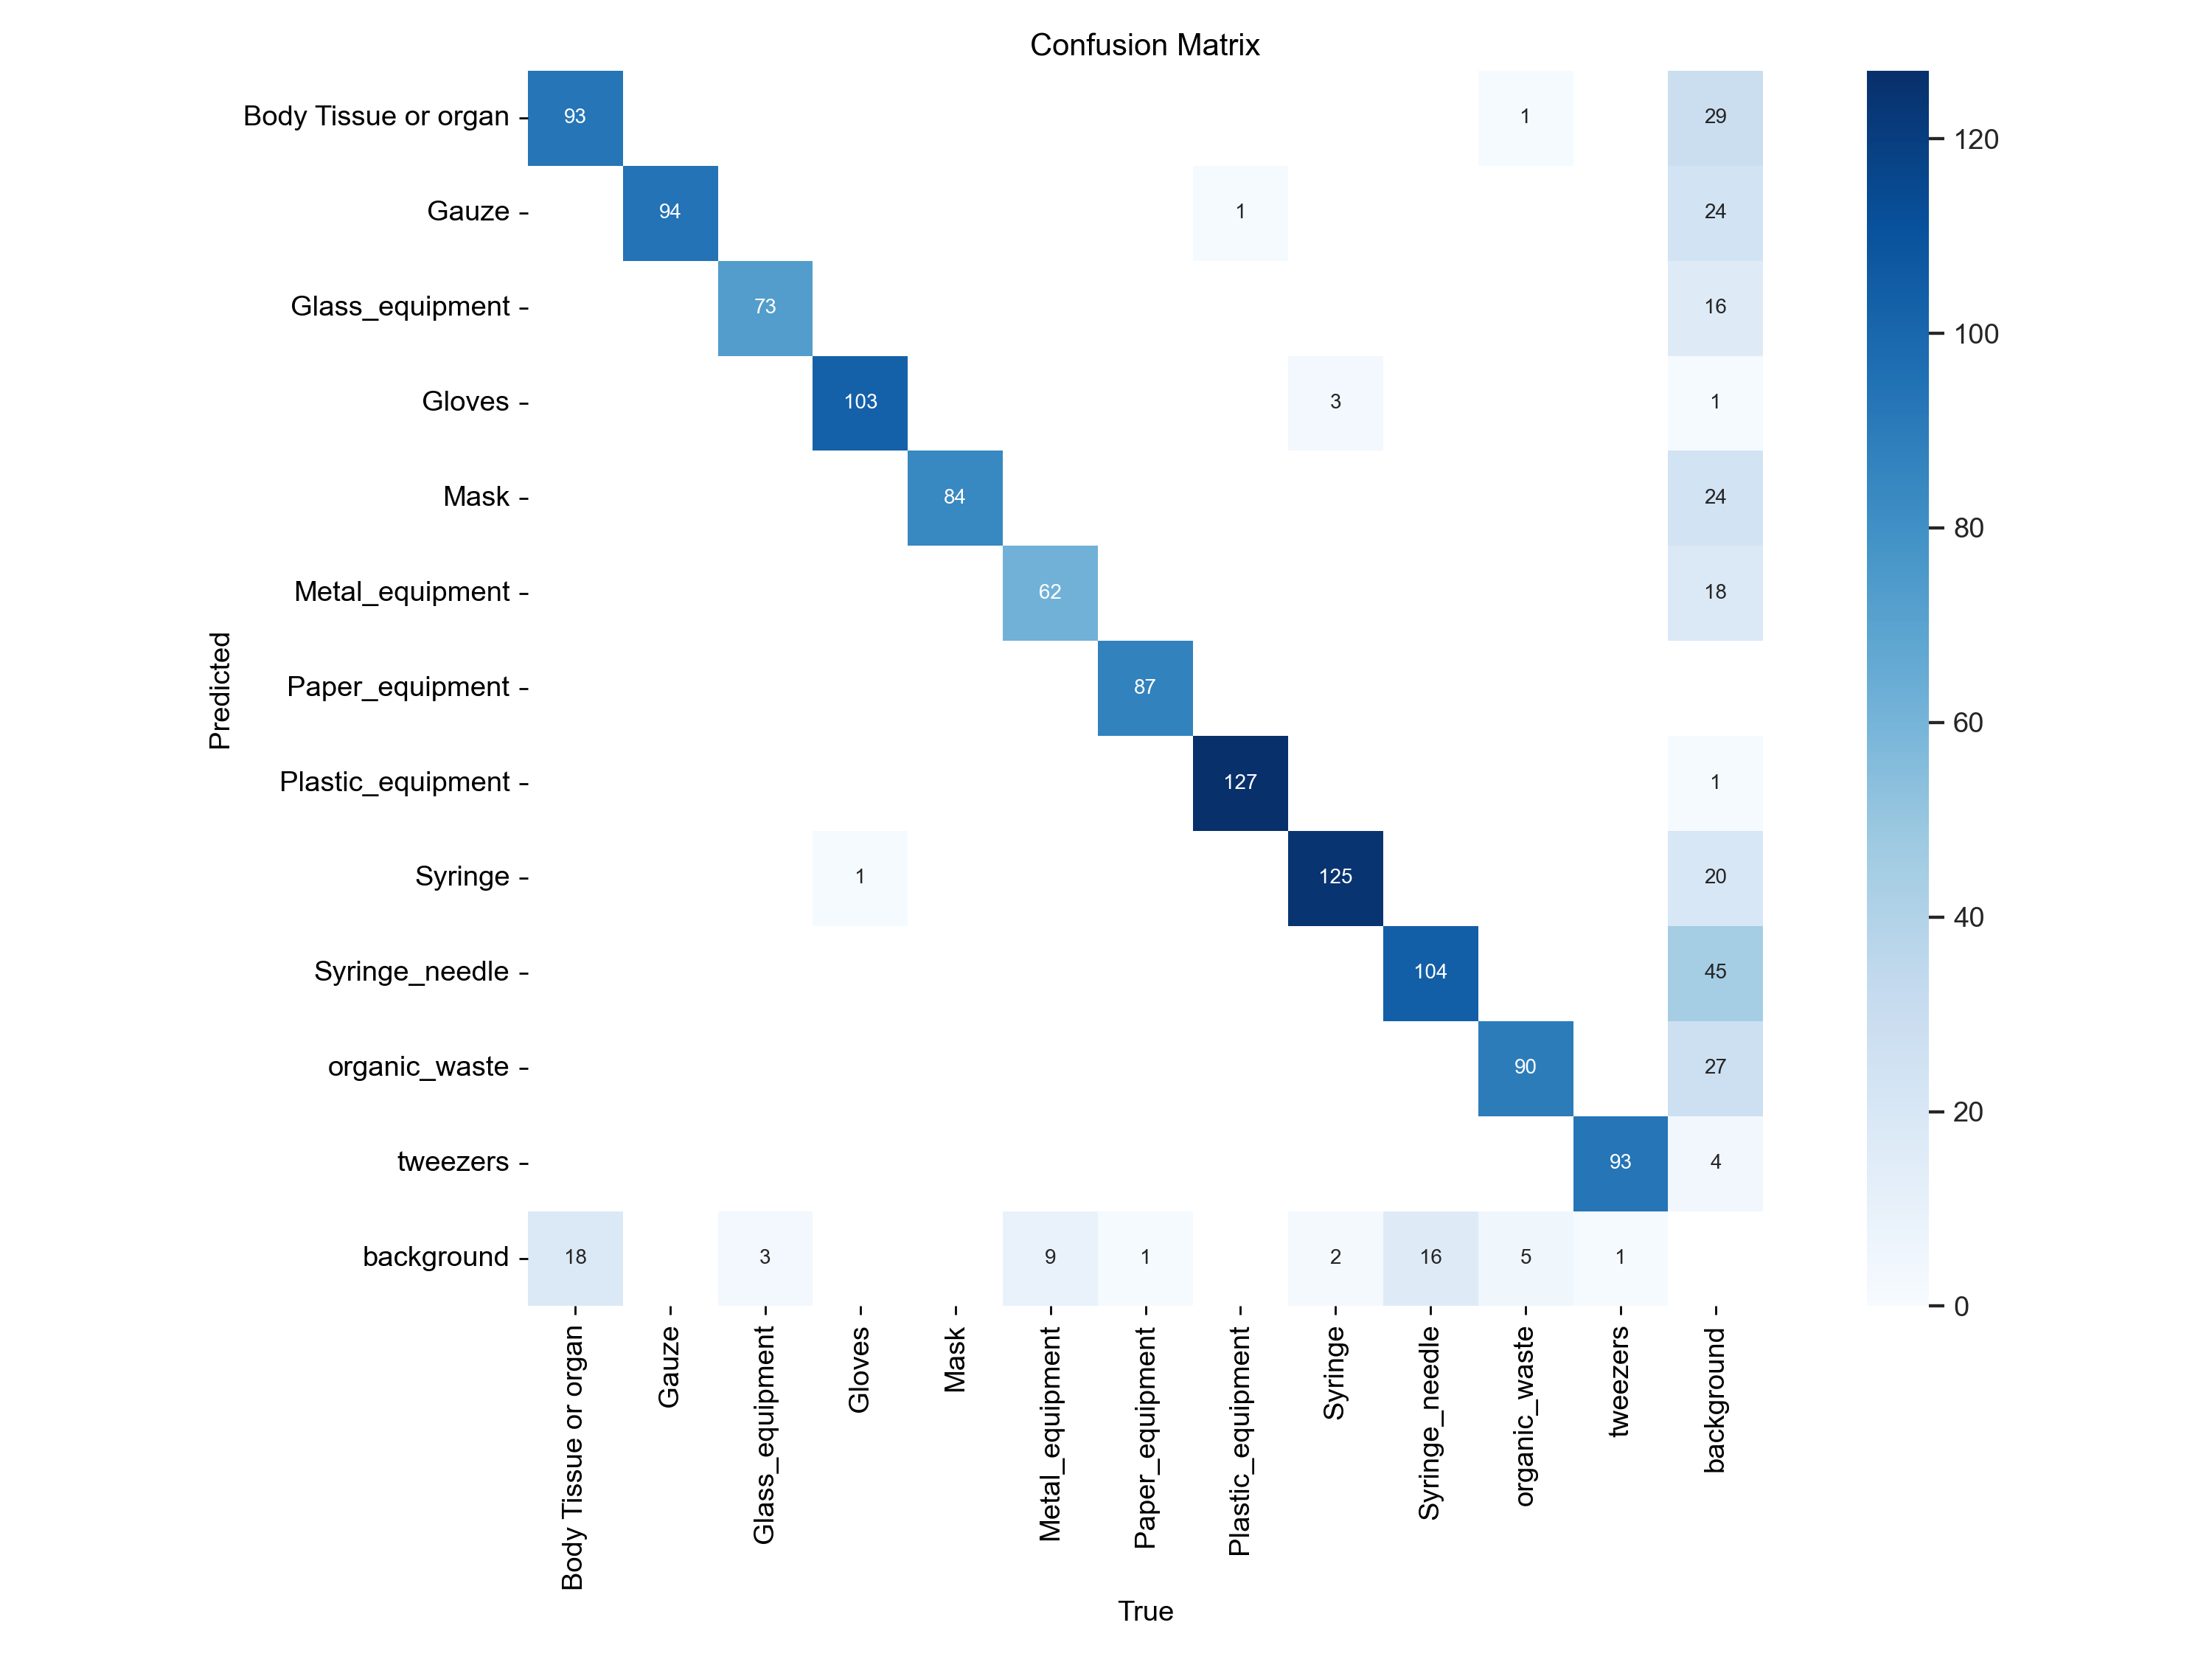

In [23]:
display(Image(filename='runs/train/yolov11_waste_cls/confusion_matrix.png'))



image 1/1 /Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s7.webp: 640x480 1 Gloves, 39.2ms
Speed: 1.0ms preprocess, 39.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2


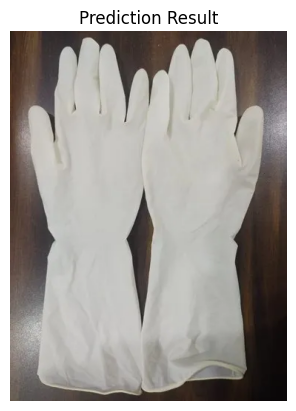

In [27]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO("runs/train/yolov11_waste_cls/weights/best.pt")

# Run inference on test images
results = model.predict(source="/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s7.webp", save=True)

# Display a few results
predicted_img_path = "/Users/abhaykumar/codeit/projects/Machine_Learning/healthcare/s7.webp"  # Change if needed
img = Image.open(predicted_img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Prediction Result")
plt.show()


In [29]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/train/yolov11_waste_cls/weights/best.pt")

# Export to ONNX (or other formats: 'onnx', 'torchscript', 'coreml', 'openvino', 'tflite', 'engine', 'pb')
model.export(format='onnx')


Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
YOLO11n summary (fused): 100 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/train/yolov11_waste_cls/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnxslim'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 32.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.0s, installed 1 package: ['onnxslim']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


ONNX: simplifier failure: No module named 'onnxslim'
ONNX: export success ✅ 9.4s, saved as 'runs/train/yolov11_waste_cls/weights/best.onnx' (10.1 MB)

Export complete (9.5s)
Results saved to /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/runs/train/yolov11_waste_cls/weights
Predict:         yolo predict task=detect model=runs/train/yolov11_waste_cls/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/train/yolov11_waste_cls/weights/best.onnx imgsz=640 data=/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml  
Visualize:       https://netron.app


'runs/train/yolov11_waste_cls/weights/best.onnx'

In [31]:
pip install onnx onnxruntime onnxsim onnx_graphsurgeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.0 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tflite_support

  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for tflite_support: filename=tflite_support-0.1.0a1-cp310-cp310-macosx_15_0_arm64.whl size=418790 sha256=47d324a0c84b68aae5e5203f8b02a904c422dbed9d487ebf95cbac5d1f7d0932
  Stored in directory: /Users/abhaykumar/Library/Caches/pip/wheels/71/5c/da/9e5e661ec26e03ee57e69428d40fffbefe3c0aff649c55776d
Successfully built tflite_support
Note: you may need to restart the kernel to use updated packages.


In [10]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/train/yolov11_waste_cls/weights/best.pt")

# Export to ONNX (or other formats: 'onnx', 'torchscript', 'coreml', 'openvino', 'tflite', 'engine', 'pb')
model.export(format='tflite')

Ultralytics 8.3.90 🚀 Python-3.10.16 torch-2.6.0 CPU (Apple M3)
YOLO11n summary (fused): 100 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/train/yolov11_waste_cls/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (5.2 MB)
requirements: Ultralytics requirement ['onnx2tf>1.17.5,<=1.26.3'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

requirements: AutoUpdate success ✅ 2.5s, installed 1 package: ['onnx2tf>1.17.5,<=1.26.3']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.17.0 opset 19...



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 0.5s, saved as 'runs/train/yolov11_waste_cls/weights/best.onnx' (10.2 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...


I0000 00:00:1744800892.977562 5621562 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1744800892.977620 5621562 single_machine.cc:374] Starting new session
W0000 00:00:1744800893.307189 5621562 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744800893.307200 5621562 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1744800893.715454 5621562 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1744800893.715525 5621562 single_machine.cc:374] Starting new session
W0000 00:00:1744800894.026314 5621562 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744800894.026323 5621562 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 14.9s, saved as 'runs/train/yolov11_waste_cls/weights/best_saved_model' (26.6 MB)

TensorFlow Lite: starting export with tensorflow 2.19.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/train/yolov11_waste_cls/weights/best_saved_model/best_float32.tflite' (10.2 MB)

Export complete (15.0s)
Results saved to /Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/runs/train/yolov11_waste_cls/weights
Predict:         yolo predict task=detect model=runs/train/yolov11_waste_cls/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/train/yolov11_waste_cls/weights/best_saved_model/best_float32.tflite imgsz=640 data=/Users/abhaykumar/codeit/projects/Machine_Learning/yolo11_pharma_dataset/data.yaml  
Visualize:       https://netron.app


'runs/train/yolov11_waste_cls/weights/best_saved_model/best_float32.tflite'